# Приоритизация гипотез и A/B-тест для увеличения выручки интернет магазина

Цель проекта: Совместно с отделом маркетинга интернет-магазина подготовлен список гипотез для увеличения выручки.
Требуется приоритизировать гипотезы используя фреймворки `ICE` и `RICE`, запустить `A/B-тест` и проанализировать результаты.

Исходные данные:
- файл с девятью гипотезами с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`:
  - `Hypothesis` — краткое описание гипотезы;
  - `Reach` — охват пользователей по 10-балльной шкале;
  - `Impact` — влияние на пользователей по 10-балльной шкале;
  - `Confidence` — уверенность в гипотезе по 10-балльной шкале;
  - `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.
- данные по заказам:
  - `transactionId` — идентификатор заказа;
  - `visitorId` — идентификатор пользователя, совершившего заказ;
  - `date` — дата, когда был совершён заказ;
  - `revenue` — выручка заказа;
  - `group` — группа A/B-теста, в которую попал заказ.
- данные по посетителям:
  - `date` — дата;
  - `group` — группа A/B-теста;
  - `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.
  
После приоритезации гипотез и проведенного A/B-теста после изменения мы будем анализировать влияния на средний чек, количество заказов и конверсию для определения успешности проведенного изменения.

# Оглавление
1 Приоритезация гипотез  
 1.1 Загрузка данных по гипотезам  
 1.2 Приоритезация гипотез через фреймворк `ICE`  
 1.3 Приоритезация гипотез через фреймворк `RICE`  
 1.4 Сравнение результатов приоритезации `ICE/RICE`  
2 Анализ результатов `A/B-теста`  
 2.1 Загрузка данных  
  2.1.1 Данные по заказам  
  2.1.2 Данные по посетителям  
 2.2 Анализ кумулятивных метрик  
  2.2.1 Подготовка данных для анализа `A/B-теста`  
  2.2.2 Кумулятивная выручка по группам  
  2.2.3 Кумулятивный средний чек по группам  
  2.2.4 Относительное различие кумулятивного среднего чека между группами  
  2.2.5 Кумулятивная средняя конверсия по группам  
  2.2.6 Относительное различие кумулятивной конверсии между группами  
 2.3 Анализ выбросов и всплесков  
  2.3.1 График количества заказов по пользователям  
  2.3.2 Расчет выборочных персентилей для количества заказов пользователей  
  2.3.3 График стоимости заказов по пользователям  
  2.3.4 Расчет выборочных персентилей для количества заказов пользователей  
 2.4 Анализ `A/B-теста`  
  2.4.1 Подготовка данных для расчета статистической значимости по `«сырым»` данным  
  2.4.2 Статистическая значимость в среднем количестве заказов пользователя по `«сырым»` данным  
  2.4.3 Статистическая значимость в среднем чеке пользователя по `«сырым»` данным  
  2.4.4 Подготовка данных для расчета статистической значимости по `«очищенным»` данным  
  2.4.5 Статистическая значимость по количеству заказов пользователя по `«очищенным»` данным  
  2.4.6 Статистическая значимость в среднем чеке пользователя по `«очищенным»` данным  
3 Вывод

Подключаем библиотеки необходимые для проведения анализа и A/B-теста

In [1]:
import numpy as np
import pandas as pd

# для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# для проведения исследования
import scipy.stats as stats

## 1. Приоритезация гипотез

### 1.1 Загрузка данных по гипотезам

Описание 
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по `10-балльной` шкале;
- `Impact` — влияние на пользователей по `10-балльной` шкале;
- `Confidence` — уверенность в гипотезе по `10-балльной` шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по `10-балльной` шкале.  

Чем больше значение `Efforts`, тем дороже проверка гипотезы.

Загружаем данные с гипотезами и оценками параметров гипотез

In [2]:
df_hypothesis = pd.read_csv('/datasets/hypothesis.csv')

Изучаем гипотезы и их параметры

In [3]:
pd.options.display.max_colwidth = 120

In [4]:
df_hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
df_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Итак, мы видим что
- у нас есть `9` гипотез с параметрами `Reach`, `Impact`, `Confidence`, `Effort`;
- пропусков нет;
- типы данных корректные.

### 1.2 Приоритезация гипотез через фреймворк `ICE`

In [6]:
df_hypothesis['ICE'] = (df_hypothesis['Impact'] * df_hypothesis['Confidence'])/df_hypothesis['Efforts']

df_ice = df_hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False).round(2)
df_ice

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Итак, наиболее перспективные гипотезы с номерами `8`, `0` и `7`. 

### 1.3 Приоритезация гипотез через фреймворк `RICE`

In [7]:
df_hypothesis['RICE'] = (df_hypothesis['Reach'] * df_hypothesis['Impact'] * df_hypothesis['Confidence'])/df_hypothesis['Efforts']

df_rice = df_hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)
df_rice

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Итак, наиболее перспективная гипотеза с номером `7`, а затем идут гипотезы `2`, `0` и `6`. 

### 1.4 Сравнение результатов приоритезации `ICE/RICE`

Смотрим на параметры гипотез отсортированные по убыванию значения `RICE'

In [8]:
df_hypothesis.sort_values(by='RICE', ascending=False).round(2)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Строим гистограмму с рейтингами гипотез с разделением по фреймворками `ICE` и `RICE`

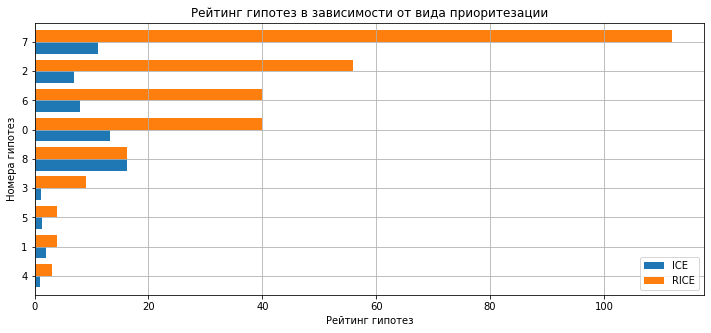

In [9]:
df_hypothesis[['ICE', 'RICE']].sort_values(by='RICE', ascending=True).plot(kind='barh', width=0.8, figsize=(12, 5))
plt.title('Рейтинг гипотез в зависимости от вида приоритезации')
plt.ylabel('Номера гипотез')
plt.xlabel('Рейтинг гипотез')
plt.grid();

Разница в приоритезации гипотез между фреймворками получилась из-за параметра `Reach`, который показывает как много пользователей затронет гипотеза. У лидера - гипотезы `7` он составляет `10 из 10`

In [10]:
df_hypothesis_check = df_hypothesis.sort_values(by='RICE', ascending=False).round(2).head(4)['Hypothesis']
n = 1
print('Итак, мы будем использовать следующие гипотезы для проверки в порядке убывания приоритета:')
for i in df_hypothesis_check.index:
    print(f'{n}. {df_hypothesis_check.loc[i]}')
    n+=1

Итак, мы будем использовать следующие гипотезы для проверки в порядке убывания приоритета:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


## 2 Анализ результатов A/B-теста

### 2.1 Загрузка данных

#### 2.1.1 Данные по заказам

Имеем следующие данные в таблице заказов:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

In [11]:
df_orders = pd.read_csv('/datasets/orders.csv')

In [12]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Смотрим на типы данных и наличие пропусков

In [13]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пропусков нет. В колонке `date` тип данных некорректный

Исправляем некорректный тип даных в колонке `date`

In [14]:
df_orders['date'] = pd.to_datetime(df_orders['date'])

Проверяем, что тип данных исправлен

In [15]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Смотрим на корректность названий в колонке `group`

In [16]:
df_orders['group'].unique()

array(['B', 'A'], dtype=object)

Названия групп корректные

Проверяем данные на наличие дубликатов

Считаем количество полных дубликатов

In [17]:
df_orders.duplicated().sum()

0

Полных дубликатов нет

Проверяем не попали ли покупатели в разные группы

In [18]:
intersection = set(df_orders[df_orders['group']=='A']['visitorId']) \
                .intersection(set(df_orders[df_orders['group']=='B']['visitorId']))
print(intersection)

{3957174400, 3984495233, 2780786433, 1294878855, 1648269707, 1614305549, 4120364173, 232979603, 199603092, 4266935830, 2712142231, 2587333274, 2716752286, 3891541246, 1668030113, 2654030115, 3234906277, 1230306981, 1404934699, 3803269165, 2949041841, 237748145, 457167155, 2927087541, 1738359350, 3062433592, 3656415546, 818047933, 393266494, 963407295, 471551937, 2579882178, 3202540741, 2686716486, 1333886533, 2044997962, 3941795274, 1801183820, 2378935119, 4256040402, 4069496402, 3766097110, 8300375, 351125977, 1602967004, 276558944, 2038680547, 3951559397, 3963646447, 4186807279, 3717692402, 1959144690, 2458001652, 2600415354, 2954449915, 1316129916, 477780734, 3972127743}


Одинаковые пользователи попали в обе группы

Считаем количество покупателей, которые попали в обе группы и их долю в каждой группе

In [19]:
print(f"""Количество покупателей, которые попали в обе группы равно {len(intersection)}
Процент задублированных покупателей двух групп от покупателей группы A равна {(round(100*len(intersection)
                                                                /len(df_orders[df_orders['group']=='A']
                                                                ['visitorId']
                                                                .unique()),2))}%
Процент задублированных покупателей двух групп от покупателей группы B равна {(round(100*len(intersection)
                                                                /len(df_orders[df_orders['group']=='B']
                                                                ['visitorId']
                                                                .unique()),2))}%""")

Количество покупателей, которые попали в обе группы равно 58
Процент задублированных покупателей двух групп от покупателей группы A равна 11.53%
Процент задублированных покупателей двух групп от покупателей группы B равна 9.9%


Мы видим, что есть `58` покупателей, которые присутствуют сразу в двух группах и составляют от `10-11%` от данных каждой группы, поэтому удаление этих покупателей значительно скажется на результатах. Удалять такое большое количество данных мы не можем.

Смотрим на данные в колонке `выручка заказа`

In [20]:
df_orders['revenue'].describe().round(2)

count       1197.00
mean        8348.01
std        39191.13
min           50.00
25%         1220.00
50%         2978.00
75%         8290.00
max      1294500.00
Name: revenue, dtype: float64

Смотрим на `10` самых дорогих заказов

In [21]:
df_orders['revenue'].sort_values(ascending=False).head(10)

425     1294500
1196     202740
858       93940
1136      92550
744       86620
682       78990
662       78990
743       67990
1103      66350
1099      65710
Name: revenue, dtype: int64

Смотрим на выручку между группами

In [22]:
df_orders.pivot_table(index='group', values='revenue', aggfunc='sum')

,revenue
group,
A,4084803
B,5907760


Смотрим на данные по количеству заказов

Посчитаем количество заказов у пользователей

In [23]:
df_orders_gr = df_orders.pivot_table(index='visitorId', values='transactionId', aggfunc='nunique') \
                        .sort_values(by='transactionId', ascending=False)
df_orders_gr.value_counts()

transactionId
1                937
2                 64
3                 17
5                  6
4                  3
11                 2
8                  1
9                  1
dtype: int64

In [24]:
df_orders_gr['transactionId'].describe().round(2)

count    1031.00
mean        1.16
std         0.72
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        11.00
Name: transactionId, dtype: float64

Смотрим на количество заказов между группами

In [25]:
df_orders.pivot_table(index='group', values='transactionId', aggfunc='count')

,transactionId
group,
A,557
B,640


Смотрим на количество покупателей между группами

In [26]:
df_orders.pivot_table(index='group', values='visitorId', aggfunc='nunique')

,visitorId
group,
A,503
B,586


Мы видим, что
- пропущенных значений в данных нет;
- в колонке `date` тип данных был некорректный, его изменили на `datetime`;
- явных дубликатов нет;
- у нас есть `58` покупателей, которые оказались в обеих группах(это `11.53%` от покупателей группы A и `9.9%` от покупателей группы B;
- за период теста было сделано `1197` заказов в обеих группах стоимостью от `50` до `1294500`;
- есть очень дорогие заказы стоимостью `1294500` и `202740` при медианной выручке с заказа равной `2978`;
- за период теста покупки совершил 1031 пользователь и количество заказов было от `1` до `11` на пользователя;
- есть покупатели с большим количеством заказов от `5` и `11` при медианном количестве заказов равном `1`;
- выручка распределилась между группами `A` и `B` так `4084803` и `5907760`;
- количество покупателей распределилось между группами `A` и `B` так `503` и `586`
- количество заказов распределилось между группами `A` и `B` так `557` и `640`.

#### 2.1.2 Данные по посетителям

Имеем следующие данные в таблице посещений:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

Загружаем данные

In [27]:
df_visitors = pd.read_csv('/datasets/visitors.csv')

Смотрим на первые 5 строк

In [28]:
df_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Смотрим на типы данных и наличие пропусков

In [29]:
df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков нет. В колонке `date` тип данных некорректный

Исправляем некорректный тип даных в колонке `date`

In [30]:
df_visitors['date'] = pd.to_datetime(df_visitors['date'])

Проверяем, что тип данных исправлен

In [31]:
df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Смотрим на корректность названий в колонке `group`

In [32]:
df_visitors['group'].unique()

array(['A', 'B'], dtype=object)

Названия групп корректные

Проверяем данные на наличие дубликатов

In [33]:
df_visitors.duplicated().sum()

0

Смотрим на распределение посетителей между группами

In [34]:
df_visitors.pivot_table(index='group', values='visitors', aggfunc='sum')

,visitors
group,
A,18736
B,18916


Смотрим на разброс данных по пользователям

In [35]:
df_visitors['visitors'].describe().round(2)

count     62.00
mean     607.29
std      114.40
min      361.00
25%      534.00
50%      624.50
75%      710.50
max      770.00
Name: visitors, dtype: float64

Итак
- пропущенных значений в данных нет;
- явных дубликатов в данных нет;
- `A/B-тест` проходил `31` день;
- количество посетителей в течении всего теста распределено между группами `A` и `B` примерно одинаковое - `18736` и `18916`;
- минимально было `361`, максимально `770`, а в среднем `607` посетителей;
- тип данных в колонке `date` на `datetime` был исправлен.

### 2.2 Анализ кумулятивных метрик

#### 2.2.1 Подготовка данных для анализа A/B-теста

Подготовим данные для анализа `A/B-теста`

In [36]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = df_orders[['date', 'group']].drop_duplicates()

In [37]:
# получаем агрегированные кумулятивные по дням данные о заказах
df_ordersAggregated = datesGroups.apply(
    lambda x: df_orders[
        np.logical_and(
            df_orders['date'] <= x['date'], df_orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
df_ordersAggregated.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
]

df_ordersAggregated

,date,group,orders,buyers,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [38]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
df_visitorsAggregated = datesGroups.apply(
    lambda x: df_visitors[
        np.logical_and(
            df_visitors['date'] <= x['date'], df_visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

df_visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [39]:
# объединяем кумулятивные данные в одной таблице и корректируем названия столбцов
cumulativeData = df_ordersAggregated.merge(
    df_visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [40]:
#разделяем данные по группам

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#### 2.2.2 Кумулятивная выручка по группам

Строим графики кумулятивной выручки по дням с разделением по группам

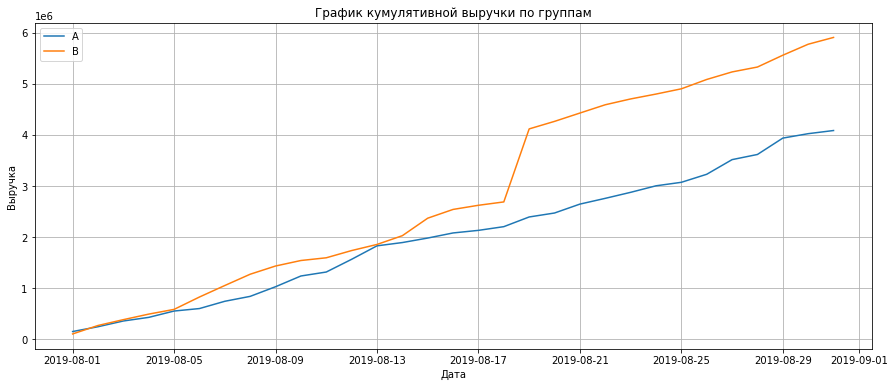

In [41]:
# Задаем размер графика
fig = plt.figure(figsize=(15, 6))

# Строим график выручки группы А
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='B')

plt.grid()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')

plt.legend();

По обеим группам выручка растет в течении всего теста. В сегменте `B` наблюдается резкий скачок выручки `19 августа`, что произошло из-за аномально дорогих заказов обнаруженных при первичном анализе данных.

#### 2.2.3 Кумулятивный средний чек по группам

Строим графики кумулятивного среднего чека по дням с разделением по группам

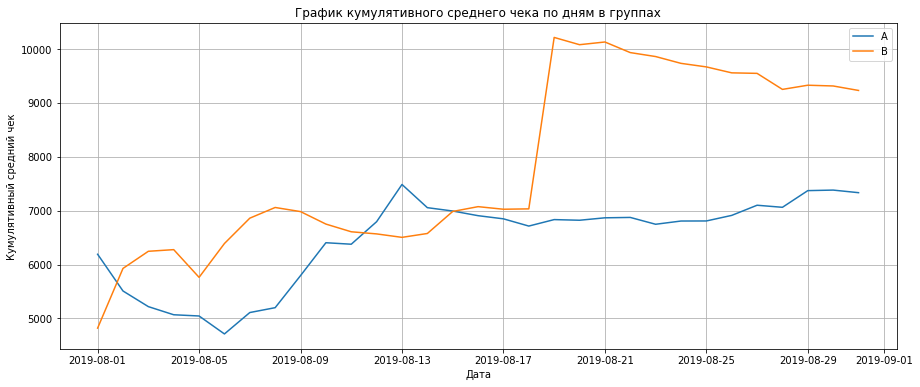

In [42]:
# Задаем размер графика
fig = plt.figure(figsize=(15, 6))

plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['orders'], label='B')

plt.grid()
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.title('График кумулятивного среднего чека по дням в группах')

plt.legend();

В начале теста средний чек группы `B` выше чем в группе `A`, но ближе к середине теста кумулятивный средний чек по обеим группам выравнивается на уровне `7000`. После середины теста в районе `19 августа` в группе `B` наблюдается резкий скачок из-за одной или нескольких дорогих покупок и далее он плавно снижается. 

#### 2.2.4 Относительное различие кумулятивного среднего чека между группами

Чтобы нагляднее увидеть разницу между группами, строим график относительного различия среднего чека.  
Каждую его точку рассчитываем так:  
`кумулятивный средний чек группы B / кумулятивный средний чек группы A - 1`

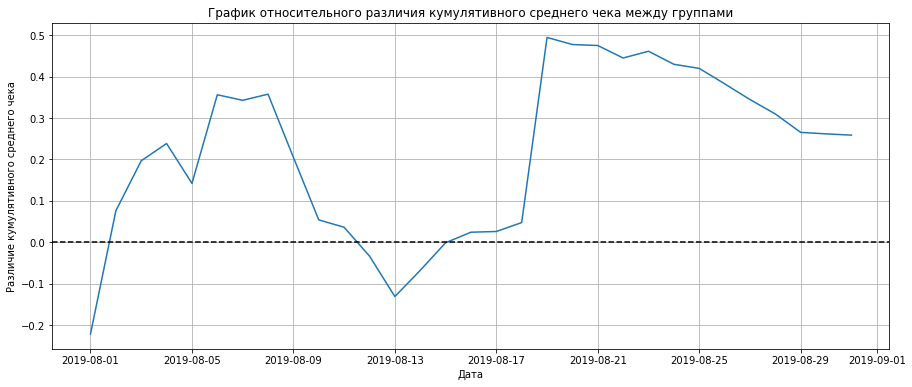

In [43]:
# Задаем размер графика
fig = plt.figure(figsize=(15, 6))

# собираем данные в одном датафрейме
mergedCumulativeData = cumulativeDataA. \
merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt. \
plot(mergedCumulativeData['date'], \
(mergedCumulativeData['revenueB']/mergedCumulativeData['ordersB']) \
/(mergedCumulativeData['revenueA']/mergedCumulativeData['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid()
plt.xlabel('Дата')
plt.ylabel('Различие кумулятивного среднего чека')
plt.title('График относительного различия кумулятивного среднего чека между группами');

В течении теста было несколько резких изменений, которые скорее всего связаны с аномально дорогими заказами как в группе `A`, так и в группе `B`.  
Для того, чтобы разобраться с аномальными заказами построим график стоимости заказов по пользователям.

#### 2.2.5 Кумулятивная средняя конверсия по группам

Строим график кумулятивного среднего количества заказов на посетителя по группам, то есть конверсии в заказ.

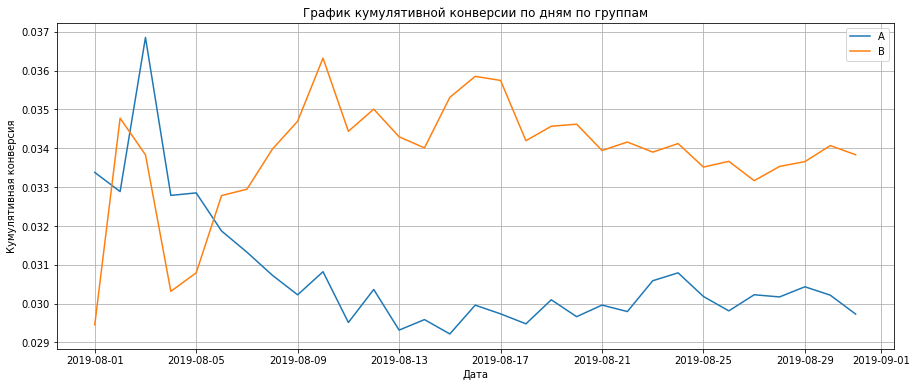

In [44]:
fig = plt.figure(figsize=(15, 6))

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.grid()
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title('График кумулятивной конверсии по дням по группам')

plt.legend();

В начале теста конверсия в группах менялась(чаще конверсия в группе `B` была ниже конверсии в группе `A`), но после `6 августа` конверсия в группе `B` стала выше конверсии в группе `A`. После `21 августа` конверсии в группах стабилизировались на уровне `3%` в группе `A` и `3.4%` в группе `B`

#### 2.2.6 Относительное различие кумулятивной конверсии между группами

Для того, чтобы лучше видеть разницу между кумулятивными коверсиями групп  построим график относительного прироста кумулятивной конверсии группы `B` к группе `A`

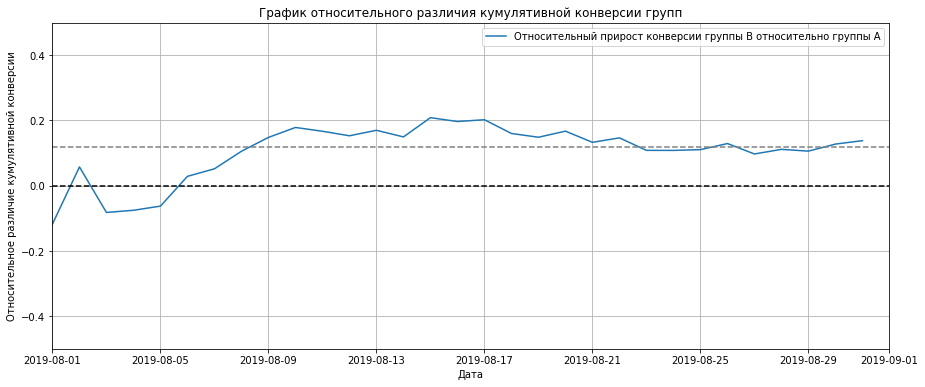

In [45]:
# Задаем размер графика
fig = plt.figure(figsize=(15, 6))

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.xlabel('Дата')
plt.ylabel('Относительное различие кумулятивной конверсии')
plt.title('График относительного различия кумулятивной конверсии групп')

plt.legend()
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5]);

В начале теста прирост конверсии в группах менялся и был отрицательным, но после `6 августа` прирост конверсии группы `B` к группе `A`стал положтельным и продолжил расти. После `21 августа` прирост конверсии в группе `B` к группе `A` стабилизировался и составил `12%`.

### 2.3 Анализ выбросов и всплесков

#### 2.3.1 График количества заказов по пользователям

Строим точетный график количества заказов по пользователлям, чтобы увидеть аномальное количество заказов визульно. Для этого воспользуемся методом scatter().

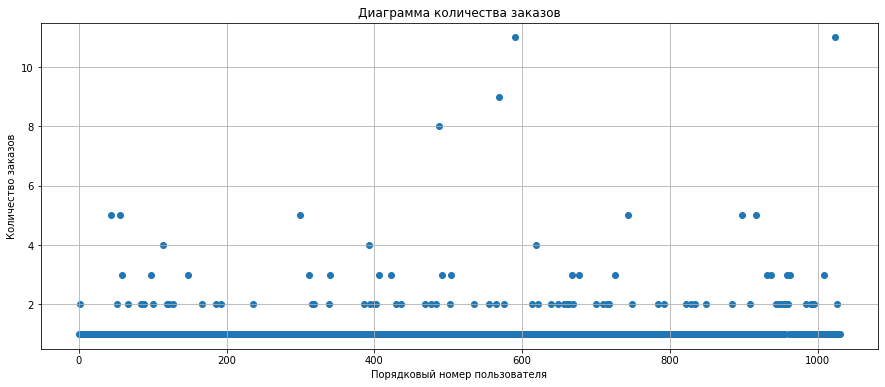

In [46]:
# строим сводную таблицу по количеству заказов пользователей
ordersByUsers = (
    df_orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

# создаем серию номеров из чисел от 0 до количества наблюдений в ordersByUsers для присвоения пользователям номера
x_values = pd.Series(range(0, len(ordersByUsers)))

# Задаем размер графика
fig = plt.figure(figsize=(15, 6))
plt.scatter(x_values, ordersByUsers['orders'])

plt.grid()
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Количество заказов')
plt.title('Диаграмма количества заказов');

Пользователи редко делают более 2 заказов. Для того, чтобы понять можем ли мы взять это значение за границу аномальных значений рассчитаем 90-й, 95-й, 98-й и 99-й выборочные перцентили количества заказов по пользователям.

#### 2.3.2 Расчет выборочных персентилей для количества заказов пользователей

In [47]:
(
ordersByUsers[['orders']] \
.quantile([0.9, 0.95, 0.98, 0.99]) 
.style.format("{:,.0f}")
)

,orders
0.9,1
0.95,2
0.98,3
0.99,4


Не более `5%` пользователей совершают более 2 заказов и не более `2%` пользователей совершают более 3 заказов. Возьмем 2 заказа за границу аномальных значений количества заказов.

#### 2.3.3 График стоимости заказов по пользователям

Строим точетный график стоимости заказов по пользователлям, чтобы увидеть аномальную выручку заказов визульно. Для этого воспользуемся методом scatter().

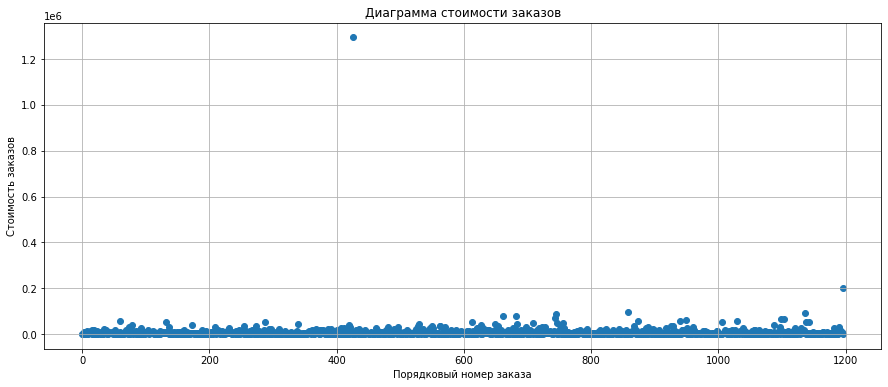

In [48]:
# создаем серию номеров из чисел от 0 до количества наблюдений в ordersByUsers для присвоения пользователям номера
x_values = pd.Series(range(0, len(df_orders['revenue'])))

# Задаем размер графика
fig = plt.figure(figsize=(15, 6))
plt.scatter(x_values, df_orders['revenue'])

plt.grid()
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Стоимость заказов')
plt.title('Диаграмма стоимости заказов');

На графике стоимости заказов видны `2` явные аномалии `1294500` и `202740`, которые мы выявили на предварительом этапе. Для выбора границы аномальной стоимости заказов рассчитаем 90-й, 95-й, 98-й и 99-й выборочные перцентили стоимости заказов.

#### 2.3.4 Расчет выборочных персентилей для количества заказов пользователей

In [49]:
(
df_orders[['revenue']] \
.quantile([0.9, 0.95, 0.98, 0.99]) 
.style.format("{:,.0f}")
)

,revenue
0.9,"18,168"
0.95,"28,000"
0.98,"44,133"
0.99,"58,233"


Не более `5%` пользователей совершают заказы стоимость которых более `28000` и не более `1%` пользователей совершают заказы стоимость которых более `58233`. Возьмем стоимость заказа `28000` за границу аномальных значений количества заказов.

### 2.4 Анализ `A/B-теста`

#### 2.4.1 Подготовка данных для расчета статистической значимости по `«сырым»` данным

Подготовим данные для расчета статистической значимости различия между группами по `«сырым»` данным

Выделяем данные по количеству посещений в группе A по дням

In [50]:
df_visitorsADaily = df_visitors[df_visitors['group'] == 'A'][['date', 'visitors']]
df_visitorsADaily.columns = ['date', 'visitorsPerDateA']

df_visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


Считаем данные по количеству посещений в группе A по дням нарастающим итогом

In [51]:
df_visitorsACummulative = df_visitorsADaily.apply(
    lambda x: df_visitorsADaily[df_visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
df_visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

df_visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Выделяем данные по количеству посещений в группе B по дням

In [52]:
df_visitorsBDaily = df_visitors[df_visitors['group'] == 'B'][['date', 'visitors']]
df_visitorsBDaily.columns = ['date', 'visitorsPerDateB']

df_visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


Считаем данные по количеству посещений в группе A по дням нарастающим итогом

In [53]:
df_visitorsBCummulative = df_visitorsBDaily.apply(
    lambda x: df_visitorsBDaily[df_visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
df_visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

df_visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Выделяем данные по количеству заказов и суммарной выручке в группе A по дням

In [54]:
df_ordersADaily = (
    df_orders[df_orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
df_ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

df_ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


Считаем данные по количеству заказов и суммарной выручке в группе A по дням нарастающим итогом

In [55]:
df_ordersACummulative = df_ordersADaily.apply(
    lambda x: df_ordersADaily[df_ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
df_ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

df_ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


Выделяем данные по количеству заказов и суммарной выручке в группе B по дням

In [56]:
df_ordersBDaily = (
    df_orders[df_orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
df_ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

df_ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


Считаем данные по количеству заказов и суммарной выручке в группе B по дням нарастающим итогом

In [57]:
df_ordersBCummulative = df_ordersBDaily.apply(
    lambda x: df_ordersBDaily[df_ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
df_ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

df_ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


Собираем все данные в одну таблицу

In [58]:
data = (
    df_ordersADaily.merge(
        df_ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(df_ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(df_ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(df_visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(df_visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(df_visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(df_visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Считаем данные по количеству заказов у пользователей в группе A

In [59]:
ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersA.head()

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


Считаем данные по количеству заказов у пользователей в группе B

In [60]:
ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

ordersByUsersB.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


#### 2.4.2 Статистическая значимость в среднем количестве заказов пользователя по `«сырым»` данным

Проверим гипотезы о различии показателей по количеству заказов в группах А и В.  

Гипотезы:  
H0: статистически значимых различий в количестве заказов нет.  
H1: статистически значимые различия в количестве заказов есть. 

Для расчета статистической значимости различий в количестве заказов, передадим критерию mannwhitneyu() данные о количестве заказов.

Формируем таблицу с количеством заказов посетителей группы `A` по `«сырым»` данным, где каждому посетителю присвоен порядковый номер. В случае, если посетитель не делал заказ, то ему будет присвоено количество заказов равное нулю.

In [61]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Формируем таблицу с количеством заказов посетителей группы `B` по `«сырым»` данным, где каждому посетителю присвоен порядковый номер. В случае, если посетитель не делал заказ, то ему будет присвоено количество заказов равное нулю.

In [62]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [63]:
alpha = 0.05
#Считаем p-value
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
delta_user_orders_B_to_A = 100*(sampleB.mean() / sampleA.mean() - 1)

if p_value < alpha:
    print(f"""Отвергаем нулевую гипотезу. 
У нас есть статистически значимые различия между количеством заказов по `«сырым»` данным.
Значение p-value = {p_value.round(3)}""")
    print(f'Количество заказов в группе B больше чем в группе A на {delta_user_orders_B_to_A.round(2)}%')
else:
    print("Не получилось отвергнуть нулевую гипотезу. Статистически значимых различий по `«сырым»` данным нет.")

Отвергаем нулевую гипотезу. 
У нас есть статистически значимые различия между количеством заказов по `«сырым»` данным.
Значение p-value = 0.017
Количество заказов в группе B больше чем в группе A на 13.81%


#### 2.4.3 Статистическая значимость в среднем чеке пользователя по `«сырым»` данным

Проверим гипотезы о различии показателей в среднем чеке в группах А и В.  

Гипотезы:  
H0: статистически значимых различий в среднем чеке нет.  
H1: статистически значимые различия в среднем чеке есть. 

Для расчета статистической значимости различий по среднему чеку, передадим критерию mannwhitneyu() данные о стоимости заказов.

Формируем сырые данные по выручке пользователей для группы `A`

In [64]:
sample_A = df_orders[df_orders['group']=='A']['revenue']

sample_A.head()

2       400
7      1044
8     13710
10     4008
12     7370
Name: revenue, dtype: int64

Формируем сырые данные по выручке пользователей для группы `B`

In [65]:
sample_B = df_orders[df_orders['group']=='B']['revenue']

sample_B.head()

0    1650
1     730
3    9759
4    2308
5    2210
Name: revenue, dtype: int64

In [66]:
alpha = 0.05
#Считаем p-value
p_value = stats.mannwhitneyu(sample_A, sample_B)[1]
delta_order_revenue_B_to_A = 100*(sample_B.mean() / sample_A.mean() - 1)

if p_value < alpha:
    print(f"""Отвергаем нулевую гипотезу. 
У нас есть статистически значимые различия между средним чеком по «сырым» данным.
Значение p-value = {p_value.round(3)}""")
    print(f'Средний чек в группе B больше среднего чека в группе A на {delta_order_revenue_B_to_A.round(2)}%')
else:
    print(f"""Не получилось отвергнуть нулевую гипотезу. Статистически значимых различий в среднем чеке по «сырым» данным нет.
Значение p-value = {p_value.round(3)}""")
print(f'Средний чек в группе B больше среднего чека в группе A на {delta_order_revenue_B_to_A.round(2)}%')

Не получилось отвергнуть нулевую гипотезу. Статистически значимых различий в среднем чеке по «сырым» данным нет.
Значение p-value = 0.729
Средний чек в группе B больше среднего чека в группе A на 25.87%


Итак, наблюдаемое различие в 25.87% между средними чеками пользователей не является статистически значимым. Мы не можем отвергнуть нулевую гипотезу.

#### 2.4.4 Подготовка данных для расчета статистической значимости по `«очищенным»` данным

Подготовим данные для расчета статистической значимости между группами по `«очищенным»` данным

Задаем границы аномальных пользователей как 95 персентиль

In [67]:
orders_lim = np.percentile(ordersByUsers['orders'], 95)
revenue_lim = np.percentile(df_orders['revenue'], 95)

In [68]:
print(f'''Аномальными считаем пользователей  при наличии более {int(orders_lim)} заказов
Аномальными считаем пользователей при наличии заказов дороже {int(revenue_lim)}''')

Аномальными считаем пользователей  при наличии более 2 заказов
Аномальными считаем пользователей при наличии заказов дороже 28000


Отбираем покупателей с аномальным количеством заказов

In [69]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_lim]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_lim]['visitorId'],
    ],
    axis=0,
)

In [70]:
usersWithManyOrders.head()

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
Name: visitorId, dtype: int64

Считаем количество аномальных покупателей и их долю от всех покупателей


In [71]:
print(len(usersWithManyOrders))

24


In [72]:
print(len(usersWithManyOrders)/len(ordersByUsersA))

0.04771371769383698


Итак, мы имеем `4.77%` покупателей с аномальным количеством заказов

Отбираем покупателей с аномальным средним чеком

In [73]:

usersWithExpensiveOrders = df_orders[df_orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [74]:
usersWithExpensiveOrders.head()

60     4256040402
73     2947100995
77      787824685
78     3288820196
131    2254586615
Name: visitorId, dtype: int64

Считаем количество аномальных покупателей и их долю от всех покупателей

In [75]:
print(len(usersWithExpensiveOrders))

60


In [76]:
print(len(usersWithExpensiveOrders)/len(ordersByUsersA))

0.11928429423459244


Итак, мы имеем `11.93%` покупателей с аномальным средним чеком

Объеденяем всех аномальных покупателей

In [77]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.head()

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

In [78]:
print(len(abnormalUsers))

74


Посчитаем сколько заказов и на какую сумму сделали эти пользователи

In [79]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [80]:
abnormalUsers_stat = df_orders[df_orders['visitorId'].isin(abnormalUsers)] \
.pivot_table(index='group', values=['transactionId', 'revenue'], aggfunc={'transactionId':'nunique', 'revenue':'sum'})
abnormalUsers_stat

,revenue,transactionId
group,,
A,1640997,84
B,3071238,80


In [81]:
normalUsers_stat = df_orders \
.pivot_table(index='group', values=['transactionId', 'revenue'], aggfunc={'transactionId':'nunique', 'revenue':'sum'})
normalUsers_stat

,revenue,transactionId
group,,
A,4084803,557
B,5907760,640


In [82]:
stat = abnormalUsers_stat/normalUsers_stat
stat.round(2)

,revenue,transactionId
group,,
A,0.40,0.15
B,0.52,0.12


Итак, мы видим что
- пользователи с аномальными заказами сделали `40%` выручки в группе `A` и `52%` выручки в группе `B`;
- пользователи с аномальными заказами сдели `15%` выручки в группе `A` и `12%` заказов в группе `B`.

#### 2.4.5 Статистическая значимость по количеству заказов пользователя по `«очищенным»` данным

Проверим гипотезы о различии показателей по количеству заказов в группах А и В по `«очищенным»` данным.  

Гипотезы:  
H0: статистически значимых различий в количестве заказов нет.  
H1: статистически значимые различия в количестве заказов есть. 

Для расчета статистической значимости различий в количестве заказов, передадим критерию mannwhitneyu() данные о количестве заказов.

Формируем таблицу с количеством заказов посетителей группы `A` по `«очищенным»` данным, где каждому посетителю присвоен порядковый номер. В случае, если посетитель не делал заказ, то ему будет присвоено количество заказов равное нулю.

In [83]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleAFiltered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Формируем таблицу с количеством заказов посетителей группы `B` по `«очищенным»` данным, где каждому посетителю присвоен порядковый номер. В случае, если посетитель не делал заказ, то ему будет присвоено количество заказов равное нулю.

In [84]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [85]:
alpha = 0.05
#Считаем p-value
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
delta_user_orders_B_to_A = 100*(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)

if p_value < alpha:
    print(f"""Отвергаем нулевую гипотезу. 
У нас есть статистически значимые различия между количеством заказов по `«очищенным»` данным.
Значение p-value = {p_value.round(3)}""")
    print(f'Количество заказов в группе B больше чем в группе A на {delta_user_orders_B_to_A.round(2)}%')
else:
    print("Не получилось отвергнуть нулевую гипотезу. Статистически значимых различий по `«очищенным»` данным нет.")

Отвергаем нулевую гипотезу. 
У нас есть статистически значимые различия между количеством заказов по `«очищенным»` данным.
Значение p-value = 0.013
Количество заказов в группе B больше чем в группе A на 17.27%


#### 2.4.6 Статистическая значимость в среднем чеке пользователя по `«очищенным»` данным

Проверим гипотезы о различии показателей в среднем чеке в группах А и В.  

Гипотезы:  
H0: различий в среднем чеке нет.  
H1: различия в среднем чеке есть. 

Для расчета статистической значимости различий по среднему чеку, передадим критерию mannwhitneyu() данные о стоимости заказов.

Формируем очищенные данные для группы A

In [86]:
sample_AFiltered = df_orders[
                        np.logical_and(
                                        df_orders['group'] == 'A',
                                        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
                                        )
                            ]['revenue']

sample_AFiltered.head()

2       400
7      1044
8     13710
10     4008
12     7370
Name: revenue, dtype: int64

Формируем очищенные данные для группы B

In [87]:
sample_BFiltered = df_orders[
                        np.logical_and(
                                        df_orders['group'] == 'B',
                                        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)),
                                        )
                            ]['revenue']

sample_BFiltered.head()

0    1650
1     730
3    9759
4    2308
5    2210
Name: revenue, dtype: int64

In [88]:
alpha = 0.05
#Считаем p-value
p_value = stats.mannwhitneyu(sample_AFiltered, sample_BFiltered)[1]
delta_order_revenue_B_to_A_filtred = 100*(sample_BFiltered.mean() / sample_AFiltered.mean() - 1)

if p_value < alpha:
    print(f"""Отвергаем нулевую гипотезу. 
У нас есть статистически значимые различия между средним чеком по `«очищенным»` данным.
Значение p-value = {p_value.round(3)}""")
    print(f'Средний чек в группе B больше среднего чека в группе A на {delta_order_revenue_B_to_A_filtred.round(2)}%')
else:
    print(f"""Не получилось отвергнуть нулевую гипотезу. 
Статистически значимых различий в среднем чеке по `«очищенным»` данным нет.
Значение p-value = {p_value.round(3)}""")
print(f'Средний чек в группе B отличается от среднего чека в группе A на {delta_order_revenue_B_to_A_filtred.round(2)}%')

Не получилось отвергнуть нулевую гипотезу. 
Статистически значимых различий в среднем чеке по `«очищенным»` данным нет.
Значение p-value = 0.738
Средний чек в группе B отличается от среднего чека в группе A на -1.96%


При анализе разницы в количестве заказов
- мы отвергли нулевую гипотезу об `отсутствии статистически значимых различий в количестве заказов`
- оказалось что как по `«сырым»` данным, так и по `«очищенным»` данным есть статистически значимые различия по количеству заказов между группами;
- по `«сырым»` данным количество заказов в группе `B` больше чем в группе `A` на `13.81%`(значение `p-value` равно `0.017`), а по `«очищенным»` данным количество заказов в группе `B` больше чем в группе `A` на `17.27%`(значение `p-value` равно `0.013`)  

При анализе разницы в срееднем чеке
- мы не смогли отвергнуть нулевую гипотезу об `отсутствии статистически значимых различий в среднем чеке`
- оказалось что как по `«сырым»` данным, так и по `«очищенным»` данным нет статистически значимых различий в среднем чеке между группами;
- по `«сырым»` данным `p-value` равно `0.729`, а по `«очищенным»` данным значение `p-value` равно `0.738`  

В обоих случаях удаление аномальных значенй не изменило результаты исследования

Выводы по результатам `A/B-теста`:
- тест можно остановить, группа `B` статистически значима лучше группы `A`;
- статистические значимые различия по количеству заказов есть;
- в среднем в группе `B` количество заказов выше чем в группе `A` на `14-17%`;
- статистически значимых различий по среднему чеку между группами нет;
- удаление аномальных значенй не изменило результаты исследования;

### 3 Вывод

Совместно с отделом маркетинга интернет-магазина подготовлен список гипотез для увеличения выручки.
Целью проекта было приоритизировать гипотезы используя фреймворки `ICE` и `RICE`, запустить `A/B-тест` и проанализировать результаты.

Исходные данные:
- файл с девятью гипотезами с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`;
- данные по заказам;
- данные по посетителям.

Приоритезируя гипотезы фреймворками `ICE` и `RICE` мы получли разницу в приоритах гипотез из-за параметра `Reach`, который показывает как много пользователей затронет гипотеза сделали основной акцент в приоритезации на охват аудитории.

Гипотезы для проверки были расставлены в порядке убывания приоритета:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Предварительный анализ выявил, что
- пропущенных значений в данных нет;
- в колонках `date` тип данных был некорректный, его изменили на `datetime`;
- явных дубликатов нет;
- есть `58` покупателей, которые оказались в обеих группах(это `11.53%` от покупателей группы A и `9.9%` от покупателей группы B;
- за период теста было сделано `1197` заказов в обеих группах стоимостью от `50` до `1294500`;
- `A/B-тест` проходил `31` день;
- есть очень дорогие заказы стоимостью `1294500` и `202740` при медианной выручке с заказа равной `2978`;
- за период теста покупки совершил 1031 пользователь и количество заказов было от `1` до `11` на пользователя;
- есть покупатели с большим количеством заказов от `5` и `11` при медианном количестве заказов равном `1`;
- количество посетителей в течении всего теста распределено между группами группами `A` и `B` примерно одинаковое - `18736` и `18916`;
- выручка распределилась между группами `A` и `B` так `4084803` и `5907760`;
- количество покупателей распределилось между группами `A` и `B` так `503` и `586`;
- количество заказов распределилось между группами `A` и `B` так `557` и `640`;
- минимально было `361`, максимально `770`, а в среднем `607` посетителей;
- тип данных в колонке `date` на `datetime` был исправлен.

По обеим группам выручка растет в течении всего теста. В начале теста средний чек группы `B` выше чем в группе `A`, но ближе к середине теста кумулятивный средний чек по обеим группам выравнивается на уровне `7000`. После середины теста в районе `19 августа` в группе `B` наблюдается резкий скачок из-за одной или нескольких дорогих покупок и далее он плавно снижается. 

В начале теста прирост конверсии группы `B` к группе `A` менялся и был отрицательным, но после `6 августа` прирост конверсии группы `B` к группе `A`стал положтельным и продолжил расти. После `21 августа` конверсии в группах стабилизировались на уровне 3% в группе A и 3.4% в группе B, а прирост конверсии в группе `B` к группе `A` стабилизировался и составил `12%`.

Аномальные пользователи внесли следющий вклад не изменив результаты исследования
- пользователи с аномальными заказами сделали `40%` выручки в группе `A` и `52%` выручки в группе `B`;
- пользователи с аномальными заказами сдели `15%` выручки в группе `A` и `12%` заказов в группе `B`.

По результатам `A/B-теста` можно сделать выводы:
- тест можно остановить, группа `B` статистически значима лучше группы `A`;
- статистические значимые различия по количеству заказов есть;
- в среднем в группе `B` количество заказов выше чем в группе `A` на `14-17%`;
- статистически значимых различий по среднему чеку между группами нет;
- удаление аномальных значенй не изменило результаты исследования;
- тест признать `успешным`, но нужно учитывать, что в группах `A` и `B` есть `58` покупателей, которые оказались сразу в обеих группах и они составляют `10-11%` от всех покупателей каждой из групп.

Пользователи, которые оказались одновременно в группах `A` и `B` не были удалены, так как они составляют около `10%` пкупателей каждой группы и у нас есть возможность исключить их тольоко из данных о покупателях и нет возможности исключить их из данных о посетителях.